In [1]:
import sys
sys.path.append('..')

from toomredf import toomredf
from sampling.sampling import sample_location

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import LogNorm

In [2]:
df = toomredf(n=4.)
minR = 0.1
maxR = 3
minz = -2
maxz = 2
maxrho = df.density_cyl(minR, 0)
pos_samples = sample_location(df.density_cyl, 5000000, minR, maxR, minz, maxz, 0, 0, maxrho)

In [3]:
R, z = pos_samples.T[:2]
H, xedges, yedges = np.histogram2d(R, z, bins=150, normed=True)
H = H.T
X, Y = np.meshgrid(xedges, yedges)
xcentres = (xedges[:-1] + xedges[1:]) / 2
ycentres = (yedges[:-1] + yedges[1:]) / 2

In [4]:
R_real = np.linspace(minR, maxR, 1000)
z_real = np.linspace(minz, maxz, 1000)
R_grid, z_grid = np.meshgrid(R_real, z_real)
rho_grid = df.density_cyl(R_grid, z_grid)

In [5]:
cmap = cm.get_cmap('inferno')
cmap.set_bad(cmap(0))

c:\program files\python36\lib\site-packages\matplotlib\contour.py:1484: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')



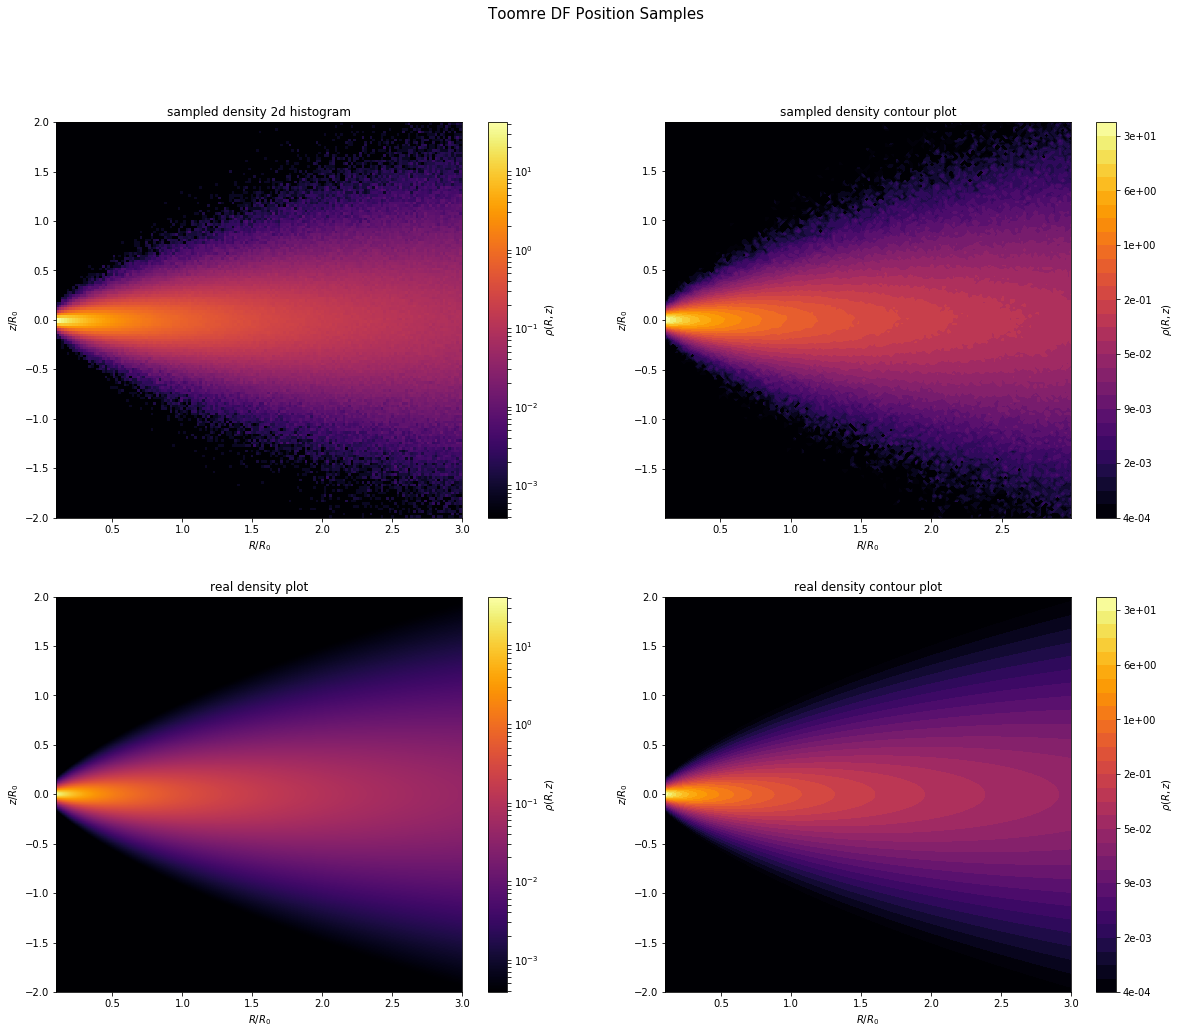

In [6]:
fig, ax = plt.subplots(2, 2, figsize=(20,16))
fig.suptitle('Toomre DF Position Samples', fontsize=15)

pcmesh = ax[0,0].pcolormesh(X, Y, H, cmap=cmap, norm=LogNorm())
fig.colorbar(pcmesh, ax=ax[0,0], label=r'$\rho(R, z)$')
ax[0,0].set_xlabel(r'$R/R_0$')
ax[0,0].set_ylabel(r'$z/R_0$')
ax[0,0].set_title('sampled density 2d histogram')

levels = np.logspace(np.log10(np.min(H[H>0])), np.log10(np.max(H[H>0])), 30)
contourf = ax[0,1].contourf(xcentres, ycentres, H, levels, cmap=cmap, norm=LogNorm())
fig.colorbar(contourf, ax=ax[0,1], ticks=levels[::4], format='%.e', label=r'$\rho(R, z)$')
ax[0,1].set_xlabel(r'$R/R_0$')
ax[0,1].set_ylabel(r'$z/R_0$')
ax[0,1].set_title('sampled density contour plot')
ax[0,1].set_facecolor(cmap(0))

im = ax[1,0].imshow(rho_grid, extent=[minR, maxR, minz, maxz], aspect='auto', 
                    cmap=cmap, norm=LogNorm(), vmin=pcmesh.colorbar.vmin, vmax=pcmesh.colorbar.vmax)
fig.colorbar(im, ax=ax[1,0], label=r'$\rho(R, z)$')
ax[1,0].set_xlabel(r'$R/R_0$')
ax[1,0].set_ylabel(r'$z/R_0$')
ax[1,0].set_title('real density plot')

contourf_real = ax[1,1].contourf(R_grid, z_grid, rho_grid, contourf.levels, cmap=cmap, norm=LogNorm())
fig.colorbar(contourf_real, ax=ax[1,1], ticks=levels[::4], format='%.e', label=r'$\rho(R, z)$')
ax[1,1].set_xlabel(r'$R/R_0$')
ax[1,1].set_ylabel(r'$z/R_0$')
ax[1,1].set_title('real density contour plot')
ax[1,1].set_facecolor(cmap(0))

plt.show()